In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
rep_df = pd.read_csv("../data/house_race_2020_clean.csv")
rep_df = rep_df.drop(columns = 'Unnamed: 0')
rep_df

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
0,Jerry Carl,R,64.9,Alabama,1,False,True,1971321,1859349
1,James Averhart,D,35.0,Alabama,1,False,False,80095,78973
2,Barry Moore,R,65.3,Alabama,2,False,True,650807,669368
3,Phyllis Harvey-Hall,D,34.6,Alabama,2,False,False,56050,55988
4,Mike D,R,67.5,Alabama,3,True,True,1193111,1218564
...,...,...,...,...,...,...,...,...,...
890,Amanda Stuck,D,36.0,Wisconsin,8,False,False,416978,399916
891,Liz Cheney,R,68.6,Wyoming,1,True,True,3003883,3060167
892,Lynnette Grey,D,24.6,Wyoming,1,False,False,134597,132235
893,Nikema Williams,D,85.2,Georgia,5,False,True,553964,362801


In [3]:
rep_df.query('State == "Georgia" and District == 5')

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
237,Robert Franklin,D,0.0,Georgia,5,False,False,360473,358394
238,Kwanza Hall,D,0.0,Georgia,5,False,False,239597,227091
239,Chase Oliver,L,0.0,Georgia,5,False,False,9225,5220
240,Steven Muhammad,I,0.0,Georgia,5,False,False,3497,4965
893,Nikema Williams,D,85.2,Georgia,5,False,True,553964,362801
894,Angela Stanton,R,14.9,Georgia,5,False,False,305279,301338


In [4]:
winner_df = rep_df.query('Winner == True')
winner_df

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
0,Jerry Carl,R,64.9,Alabama,1,False,True,1971321,1859349
2,Barry Moore,R,65.3,Alabama,2,False,True,650807,669368
4,Mike D,R,67.5,Alabama,3,True,True,1193111,1218564
6,Robert B,R,82.5,Alabama,4,True,True,1255076,1323812
7,Mo Brooks,R,95.8,Alabama,5,True,True,655365,210045
...,...,...,...,...,...,...,...,...,...
885,Glenn Grothman,R,59.3,Wisconsin,6,True,True,1815756,1736659
887,Tom Tiffany,R,60.8,Wisconsin,7,True,True,2637459,2514740
889,Mike Gallagher,R,64.0,Wisconsin,8,True,True,3202905,2841801
891,Liz Cheney,R,68.6,Wyoming,1,True,True,3003883,3060167


## How often does the incumbent candidate win a race?

In [5]:
winner_df.query("Incumbent == True")['Candidate'].count() / winner_df['Candidate'].count()

0.8528735632183908

In [6]:
winner_df['Incumbent'].value_counts()

Incumbent
True     371
False     64
Name: count, dtype: int64

In [7]:
winner_df['Incumbent'] = winner_df['Incumbent'].astype(object)

C:\Users\kidsa\AppData\Local\Temp\ipykernel_15080\961859369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winner_df['Incumbent'] = winner_df['Incumbent'].astype(object)


In [8]:
winner_df.dtypes

Candidate     object
Party         object
Vote         float64
State         object
District       int64
Incumbent     object
Winner          bool
Raised         int64
Spent          int64
dtype: object

In [9]:
winner_df

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
0,Jerry Carl,R,64.9,Alabama,1,False,True,1971321,1859349
2,Barry Moore,R,65.3,Alabama,2,False,True,650807,669368
4,Mike D,R,67.5,Alabama,3,True,True,1193111,1218564
6,Robert B,R,82.5,Alabama,4,True,True,1255076,1323812
7,Mo Brooks,R,95.8,Alabama,5,True,True,655365,210045
...,...,...,...,...,...,...,...,...,...
885,Glenn Grothman,R,59.3,Wisconsin,6,True,True,1815756,1736659
887,Tom Tiffany,R,60.8,Wisconsin,7,True,True,2637459,2514740
889,Mike Gallagher,R,64.0,Wisconsin,8,True,True,3202905,2841801
891,Liz Cheney,R,68.6,Wyoming,1,True,True,3003883,3060167


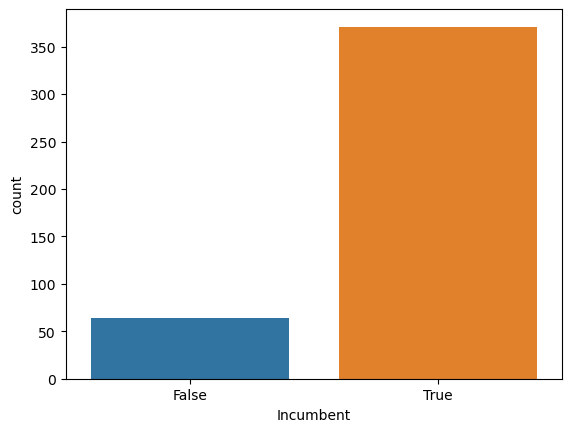

In [10]:
sns.countplot(data= winner_df, x = 'Incumbent');

## Can you detect any relationship between amount of money raised and the incumbent status of a candidate?

In [11]:
incumbent_df = rep_df.query("Incumbent == True")
not_incumbent_df = rep_df.query("Incumbent != True")

### What percentage of incumbents raised over $1 million

In [12]:
((incumbent_df['Raised'] > 1000000).value_counts())/ incumbent_df['Raised'].count()

Raised
True     0.796875
False    0.203125
Name: count, dtype: float64

About 80% of incumbents raised over $1 million 

In [13]:
((incumbent_df['Raised'] > 10000000).value_counts())/ incumbent_df['Raised'].count()

Raised
False    0.973958
True     0.026042
Name: count, dtype: float64

About 2.6% of incumbents raised over $10 million

In [14]:
incumbent_df.query("Raised > 10000000")

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
59,Nancy Pelosi,D,77.6,California,12,True,True,27359508,22064953
77,Devin Nunes,R,54.2,California,22,True,True,26825212,20156093
79,Kevin McCarthy,R,62.1,California,23,True,True,27780644,24265583
89,Adam Schiff,D,72.7,California,28,True,True,19382855,10188664
120,Katie Porter,D,53.5,California,45,True,True,16627706,6443700
348,Steve Scalise,R,72.2,Louisiana,1,True,True,37262827,32830607
541,Alexandria Ocasio-Cortez,D,68.7,New York,14,True,True,20664795,16735422
555,Elise Stefanik,R,64.4,New York,21,True,True,13287248,11655936
609,Jim Jordan,R,67.9,Ohio,4,True,True,18313823,12945651
731,Dan Crenshaw,R,55.6,Texas,2,True,True,19427865,17596329


In [15]:
incumbent_df = incumbent_df.query("Raised < 10000000")
incumbent_df.head()

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
4,Mike D,R,67.5,Alabama,3,True,True,1193111,1218564
6,Robert B,R,82.5,Alabama,4,True,True,1255076,1323812
7,Mo Brooks,R,95.8,Alabama,5,True,True,655365,210045
8,Gary Palmer,R,97.1,Alabama,6,True,True,907219,909082
9,Terri Sewell,D,97.2,Alabama,7,True,True,2168165,1495957


### What percentage of non incumbents raised over $1 million

In [16]:
((not_incumbent_df['Raised'] > 1000000).value_counts()) /  not_incumbent_df['Raised'].count()

Raised
False    0.671233
True     0.328767
Name: count, dtype: float64

About 33% of non incumbents raised over $1 million

In [17]:
not_incumbent_df.query("Raised > 10000000")

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
118,Joe Collins,R,28.3,California,43,False,False,10556626,9921103
129,Darrell Issa,R,54.0,California,50,False,True,11239670,10947106
436,Lacy Johnson,R,25.8,Minnesota,5,False,False,12050564,12000896
542,John C.,R,30.5,New York,14,False,False,11140937,10947758
776,Wendy Davis,D,45.4,Texas,21,False,False,10263486,10201874


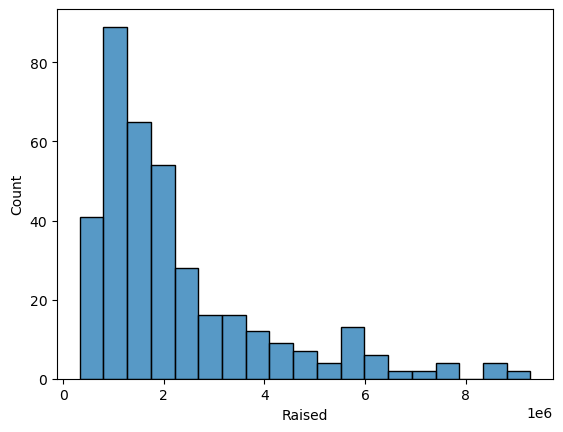

In [18]:
sns.histplot(incumbent_df, x = 'Raised');

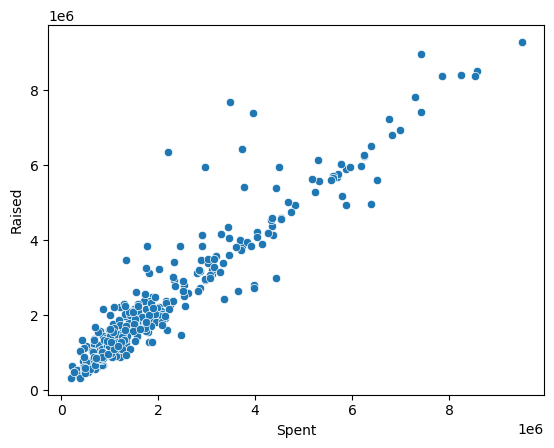

In [19]:
sns.scatterplot(data = incumbent_df, x = "Spent", y = "Raised");

<Axes: xlabel='Spent', ylabel='Raised'>

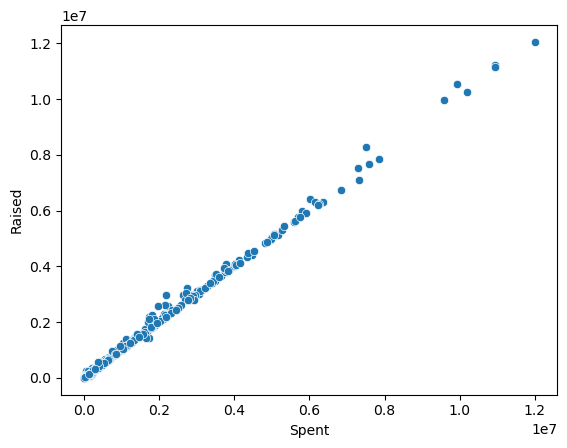

In [20]:
sns.scatterplot(data = not_incumbent_df, x = "Spent", y = "Raised")

## Top 5 States by Money Raised

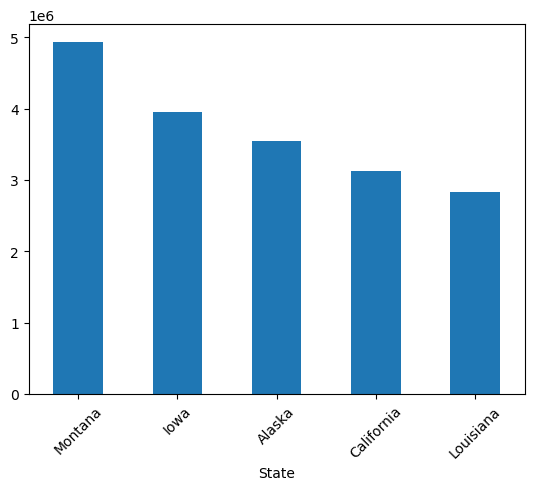

In [21]:
rep_df.groupby('State')['Raised'].mean().sort_values(ascending = False).head().plot(kind = 'bar')
plt.xticks(rotation = 45);

## How many candidates spent more than they raised

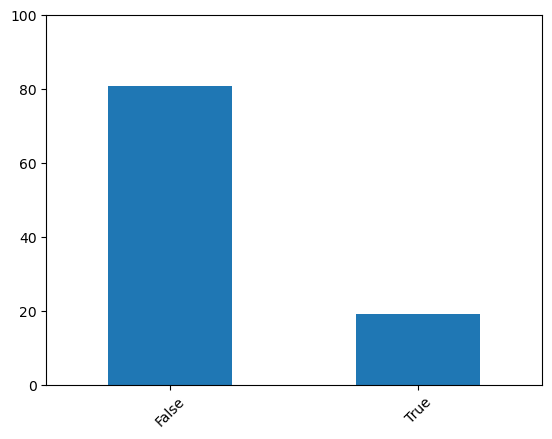

In [22]:
round((((rep_df['Spent'] > rep_df['Raised']).value_counts())/ rep_df['Spent'].count())*100,1).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.ylim(0,100);

In [23]:
rep_df['Party'] = rep_df['Party'].str.replace("D","Democrat").str.replace("R","Republican").str.replace("I","Independent").str.replace("L","Libertarian").str.replace("3","3rd Party")
rep_df

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
0,Jerry Carl,Republican,64.9,Alabama,1,False,True,1971321,1859349
1,James Averhart,Democrat,35.0,Alabama,1,False,False,80095,78973
2,Barry Moore,Republican,65.3,Alabama,2,False,True,650807,669368
3,Phyllis Harvey-Hall,Democrat,34.6,Alabama,2,False,False,56050,55988
4,Mike D,Republican,67.5,Alabama,3,True,True,1193111,1218564
...,...,...,...,...,...,...,...,...,...
890,Amanda Stuck,Democrat,36.0,Wisconsin,8,False,False,416978,399916
891,Liz Cheney,Republican,68.6,Wyoming,1,True,True,3003883,3060167
892,Lynnette Grey,Democrat,24.6,Wyoming,1,False,False,134597,132235
893,Nikema Williams,Democrat,85.2,Georgia,5,False,True,553964,362801


In [24]:
rep_df['Party'].unique()

array(['Republican', 'Democrat', 'Independent', '3rd Party',
       'Libertarian'], dtype=object)

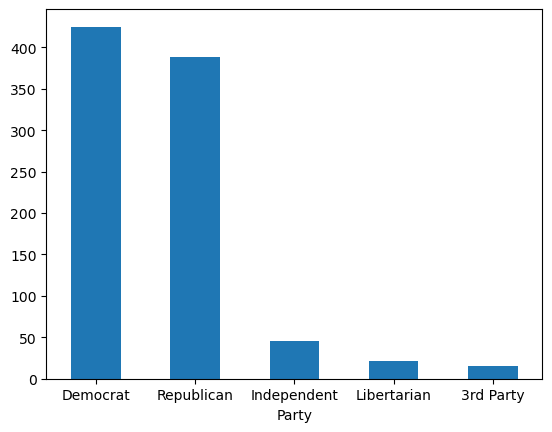

In [25]:
rep_df['Party'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0);

## Which party raised the most money

In [30]:
rep_df[['Party','Raised','Spent']].groupby('Party').sum()

,Raised,Spent
Party,,
3rd Party,544755,553120
Democrat,906272679,813541106
Independent,5854543,5759861
Libertarian,250370,209125
Republican,766816396,697708955


## Calculate % money raised of that race

In [50]:
rep_df['District'] = rep_df['District'].astype(str)

In [42]:
rep_df.dtypes

Candidate     object
Party         object
Vote         float64
State         object
District      object
Incumbent       bool
Winner          bool
Raised         int64
Spent          int64
dtype: object

In [54]:
rep_df['State_District'] = rep_df['State'] + rep_df['District']
rep_df

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent,State_District
0,Jerry Carl,Republican,64.9,Alabama,1,False,True,1971321,1859349,Alabama1
1,James Averhart,Democrat,35.0,Alabama,1,False,False,80095,78973,Alabama1
2,Barry Moore,Republican,65.3,Alabama,2,False,True,650807,669368,Alabama2
3,Phyllis Harvey-Hall,Democrat,34.6,Alabama,2,False,False,56050,55988,Alabama2
4,Mike D,Republican,67.5,Alabama,3,True,True,1193111,1218564,Alabama3
...,...,...,...,...,...,...,...,...,...,...
890,Amanda Stuck,Democrat,36.0,Wisconsin,8,False,False,416978,399916,Wisconsin8
891,Liz Cheney,Republican,68.6,Wyoming,1,True,True,3003883,3060167,Wyoming1
892,Lynnette Grey,Democrat,24.6,Wyoming,1,False,False,134597,132235,Wyoming1
893,Nikema Williams,Democrat,85.2,Georgia,5,False,True,553964,362801,Georgia5


In [60]:
rep_df.groupby('State_District').sum()['Raised'].reset_index()

,State_District,Raised
0,Alabama1,2051416
1,Alabama2,706857
2,Alabama3,1243384
3,Alabama4,1255076
4,Alabama5,655365
...,...,...
430,Wisconsin5,1526113
431,Wisconsin6,2103509
432,Wisconsin7,3899416
433,Wisconsin8,3619883
